In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Polynomial.xlsx')

In [4]:
df

,Position,Level,Salary
0,Business Analytics,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df['Position'].value_counts()

Business Analytics    1
Junior Consultant     1
Senior Consultant     1
Manager               1
Country Manager       1
Region Manager        1
Partner               1
Senior Partner        1
C-level               1
CEO                   1
Name: Position, dtype: int64

In [7]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [8]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

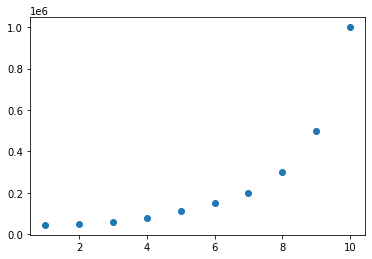

In [10]:
plt.scatter(X,y)
plt.show()

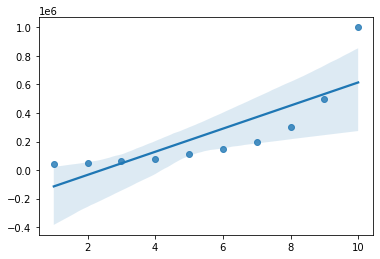

In [11]:
sns.regplot(X,y)
plt.show()

## Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X,y)

LinearRegression()

In [15]:
y_pred = lr.predict(X)

In [16]:
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

## Visualition

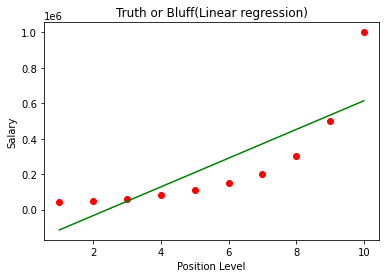

In [17]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,color='green')
plt.title('Truth or Bluff(Linear regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Training the Polynomial Regression Model on the whole Dataset

In [18]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
pr = PolynomialFeatures(degree=4)

In [20]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
X_poly = pr.fit_transform(X)   ## Converting X to X^0, X^1, X^2, X^3, X^4

In [22]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [23]:
lr_poly = LinearRegression()

In [24]:
lr_poly.fit(X_poly,y)

LinearRegression()

## Polynomial Prediction

In [25]:
y_pred_poly = lr_poly.predict(X_poly)

In [26]:
y_pred_poly

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

## Visualition on the Polynomial prediction

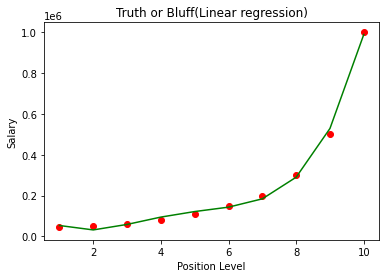

In [27]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred_poly,color='green')
plt.title('Truth or Bluff(Linear regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# Evaluating the Model

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
r2_linear = r2_score(y, y_pred)
print('r2 score of linear: ',r2_linear )

r2 score of linear:  0.6690412331929895


In [30]:
mse_linear = mean_squared_error(y, y_pred)
print('MSE of linear: ', mse_linear)

MSE of linear:  26695878787.878788


In [31]:
y_pred_poly = lr_poly.predict(X_poly)

In [32]:
y_pred_poly

array([ 53356.64335681,  31759.90675996,  58642.19114221,  94632.86713289,
       121724.94172498, 143275.05827508, 184003.49650349, 289994.17249411,
       528694.63869452, 988916.08391594])

In [33]:
### polynomial r2 score and MSE

In [34]:
r2_poly = r2_score(y, y_pred_poly)
print('r2 score of Polynomial Linear Regression: ',r2_poly )

r2 score of Polynomial Linear Regression:  0.9973922891706614


In [35]:
mse_poly = mean_squared_error(y, y_pred_poly)
print('MSE of Polynomialr Linear regression: ', mse_poly)

MSE of Polynomialr Linear regression:  210343822.8438184


## Predicting a New Result with Linear Regression

In [36]:
lr.predict([[6.5]])

array([330378.78787879])

## Predicting a new Result with Polynomial Regression

In [37]:
lr_poly.predict(pr.fit_transform([[6.5]]))

array([158862.45265153])